In [12]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [34]:
import nltk
nltk.download("punkt")
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
stemmer = PorterStemmer()
text = "Mahendra Singh Dhoni, commonly known as MS Dhoni, is a former Indian cricketer and captain of the Indian national team. He is widely regarded as one of the greatest wicket-keeper batsmen and captains in the history of cricket. Dhoni led India to numerous victories, including the ICC T20 World Cup in 2007 and the ICC Cricket World Cup in 2011."


sentences = nltk.sent_tokenize(text)
print(sentences)
print(sentences)
for i in range(len(sentences)):
    words = nltk.word_tokenize(sentences[i])
    words = [stemmer.stem(word) for word in words if word.lower() not in set(stopwords.words("english"))]
    sentences[i] = ' '.join(words)
print(sentences)

['Mahendra Singh Dhoni, commonly known as MS Dhoni, is a former Indian cricketer and captain of the Indian national team.', 'He is widely regarded as one of the greatest wicket-keeper batsmen and captains in the history of cricket.', 'Dhoni led India to numerous victories, including the ICC T20 World Cup in 2007 and the ICC Cricket World Cup in 2011.']
['Mahendra Singh Dhoni, commonly known as MS Dhoni, is a former Indian cricketer and captain of the Indian national team.', 'He is widely regarded as one of the greatest wicket-keeper batsmen and captains in the history of cricket.', 'Dhoni led India to numerous victories, including the ICC T20 World Cup in 2007 and the ICC Cricket World Cup in 2011.']
['mahendra singh dhoni , commonli known ms dhoni , former indian cricket captain indian nation team .', 'wide regard one greatest wicket-keep batsmen captain histori cricket .', 'dhoni led india numer victori , includ icc t20 world cup 2007 icc cricket world cup 2011 .']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ramba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
    import re #regular expression
    corpus = [] # corpus list
    
    for i in range(len(sentences)):
        rev = re.sub('[^a-zA-Z]', ' ', sentences[i])
        rev = rev.lower()
        rev = rev.split()
        rev = [stemmer.stem(word) for word in rev if not word in set(stopwords.words('english'))]
        rev = ' '.join(rev)
        corpus.append(rev)

In [38]:
corpus

['mahendra singh dhoni commonli known ms dhoni former indian cricket captain indian nation team',
 'wide regard one greatest wicket keep batsmen captain histori cricket',
 'dhoni led india numer victori includ icc world cup icc cricket world cup']

In [40]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()

In [42]:
X #Presence of a word in a sentence => 1
  #Absence of a word in a sentence => 0

array([[0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0,
        1, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 2]], dtype=int64)

In [44]:

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer()
X = tfv.fit_transform(corpus).toarray()

In [46]:
X #better than bag of words as values are based on freq and semantics (other than 0 and 1)

array([[0.        , 0.19480931, 0.25615083, 0.15128681, 0.        ,
        0.38961862, 0.25615083, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.51230166, 0.        , 0.25615083,
        0.        , 0.25615083, 0.25615083, 0.25615083, 0.        ,
        0.        , 0.        , 0.25615083, 0.25615083, 0.        ,
        0.        , 0.        , 0.        ],
       [0.33468921, 0.25453977, 0.        , 0.19767284, 0.        ,
        0.        , 0.        , 0.33468921, 0.33468921, 0.        ,
        0.        , 0.        , 0.        , 0.33468921, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.33468921, 0.33468921, 0.        , 0.        , 0.        ,
        0.33468921, 0.33468921, 0.        ],
       [0.        , 0.        , 0.        , 0.13949182, 0.47236035,
        0.17962111, 0.        , 0.        , 0.        , 0.47236035,
        0.23618018, 0.23618018, 0.        , 0.        , 0.        ,
        0.23618018, 0.    

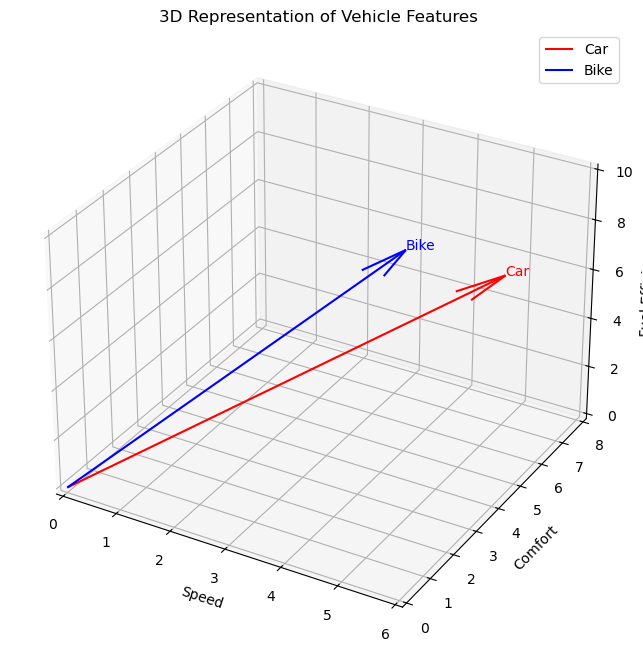

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define features
features = ['Speed', 'Comfort', 'Fuel Efficiency']

# Define vectors for Car and Bike
car_vector = np.array([5, 7, 6])   # Example values for Car
bike_vector = np.array([4, 5, 8])   # Example values for Bike

# Create a figure for the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the vectors using quiver with wider lines
ax.quiver(0, 0, 0, car_vector[0], car_vector[1], car_vector[2], color='r', label='Car', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, bike_vector[0], bike_vector[1], bike_vector[2], color='b', label='Bike', arrow_length_ratio=0.1)

# Add labels to the end of each vector
ax.text(car_vector[0], car_vector[1], car_vector[2], "Car", color='r')
ax.text(bike_vector[0], bike_vector[1], bike_vector[2], "Bike", color='b')

# Set axis labels
ax.set_xlabel('Speed')
ax.set_ylabel('Comfort')
ax.set_zlabel('Fuel Efficiency')
ax.set_title('3D Representation of Vehicle Features')

# Set limits for wider view
ax.set_xlim(0, 6)
ax.set_ylim(0, 8)
ax.set_zlim(0, 10)

# Add a legend and grid
ax.legend()
plt.grid()
plt.show()